In [1]:
from PIL import Image, ImageDraw, ImageFont
def generate_image_simple_mode(w,h,margin,txt,txt_color,bkground_color,font_file,size):
    print("Recieved: ", w,h,margin,txt,txt_color,bkground_color,font_file,size)
    w_margin_percent = margin
    h_margin_percent = margin

    w_margin = int(w * ( (w_margin_percent/100) ))
    h_margin = int(h * ( (h_margin_percent/100) ))

    w_margined_size = w - w_margin
    h_margined_size = h - h_margin

    shape = [(w_margin/2, h_margin/2), (w - w_margin/2, h - h_margin/2 )]

    #print("New width and hight : " , w_margined_size,h_margined_size)

    #txt = "Center New"
    #txt_color = "white"

    font = ImageFont.truetype(font_file, size)
    
    #pot_txt_w, pot_txt_h = font.getsize(txt)
    #print("Potential size of text : " , pot_txt_w, pot_txt_h)
    #print("Available size : " , (w_margined_size,h_margined_size))
    #if(pot_txt_w > w_margined_size ) : 
    #    print("Width is too large")
    #else : 
    #    print("Width fits")
    #if(pot_txt_h > h_margined_size ) : 
    #    print("Heigh is too large")
    #else : 
    #    print("Height fits")
    im = Image.new("RGB", (w,h), bkground_color)
    d  = ImageDraw.Draw(im)
    d.text((w/2, h/2), txt , fill=txt_color, font=font, anchor="mm")
    #d.rectangle(shape, fill=(0, 0,0), outline=(255, 255, 255))
    im.save("static/processed_image.png","PNG")

In [7]:
def get_max_font(w,h,font_file,text):
    usable_font = 0 
    i = 1 
    while(True):
        font = ImageFont.truetype(font_file, i)
        text_size = font.getsize(text)
        if (text_size[0] < w and text_size[1] < h ) : 
            usable_font = i 
        else:
            break 
        i += 1 
    return usable_font 

In [12]:
from PIL import Image, ImageDraw, ImageFont
def generate_image_simple_mode(w,h,txt,txt_color,bkground_color,font_file,size):
    font = ImageFont.truetype(font_file, size)
    im = Image.new("RGB", (w,h), bkground_color)
    d  = ImageDraw.Draw(im)
    d.text((w/2, h/2), txt , fill=txt_color, font=font, anchor="mm")
    return im 

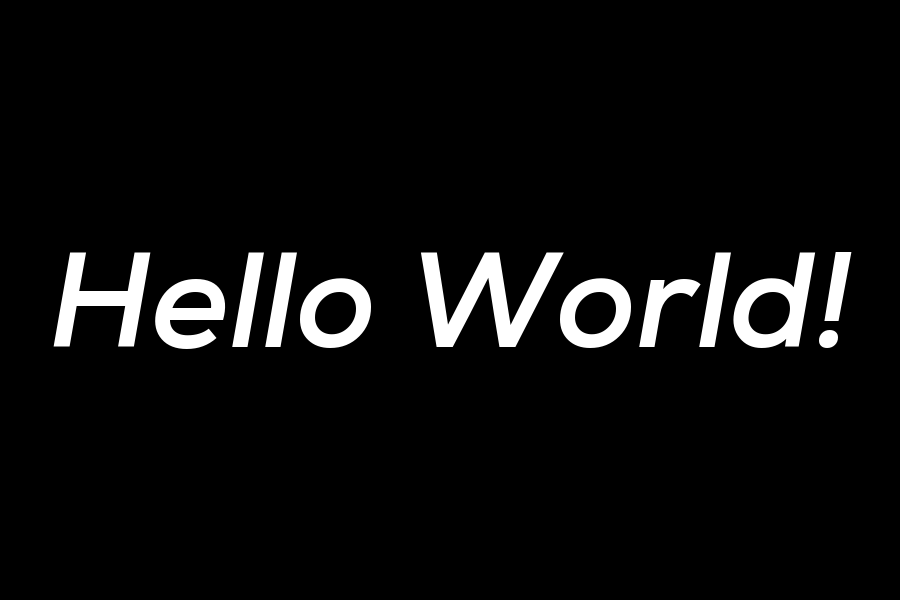

In [22]:
main_w = 900
main_h = 600
margin = 10
atext = 'Hello World!'

usable_per = (100-margin)/100
usable_w   = usable_per*main_w
usable_h   = usable_per*main_h
font_file  = 'nexa-bold-italic.ttf'
font_size  = get_max_font(usable_w,usable_h,font_file,atext)
generate_image_simple_mode(main_w,main_h,atext,'white','black',font_file,font_size)